<h1>3DReconstruction YOUth dataset</h1>


In [2]:
import os
import copy
import shutil
import math
import numpy as np
SCRIPT_PATH = os.getcwd()

ALPHAPOSE_PATH = os.path.join(SCRIPT_PATH, 'AlphaPose')
ALPHAPOSE_DATA_PATH = os.path.join(ALPHAPOSE_PATH, 'data')
YOLO_PATH = os.path.join(SCRIPT_PATH, 'YOLOv7')
PROSS_JSON_PATH = os.path.join(SCRIPT_PATH, 'ProcessJSON')
PROSS_JSON_DATA_PATH = os.path.join(PROSS_JSON_PATH, 'data')
DETECTRON_PATH = os.path.join(SCRIPT_PATH, 'detectron2')
DETECTRON_DATA_PATH = os.path.join(DETECTRON_PATH, 'data')
DMMR_PATH = os.path.join(SCRIPT_PATH, 'DMMR')
DMMR_DATA_FOLDER_PATH = os.path.join(DMMR_PATH, 'data')
DMMR_DATA_PATH = os.path.join(DMMR_DATA_FOLDER_PATH, 'YOUth')
DMMR_CAMPARAMS_PATH = os.path.join(DMMR_DATA_FOLDER_PATH, 'YOUth_camparams')
DMMR_IMAGES_PATH = os.path.join(DMMR_DATA_PATH, 'images')
DMMR_KEYPOINTS_PATH = os.path.join(DMMR_DATA_PATH, 'keypoints')
DMMR_OUT_REPROJ_PATH = os.path.join(DMMR_PATH, 'output', 'reprojection')


In [2]:
#video_path = "Videos/data/B33718_00.13.40_00.14.15/B33718.mp4" #v1         #Done
#video_path = "Videos/data/B33892_00.10.00_00.10.35/B33892.mp4" #v2         #Done
#video_path = "Videos/data/B35985_00.10.50_00.11.25/B35985.mp4"  #v3        #Done
#video_path = "Videos/data/B38777_00.11.17_00.11.52/B38777.mp4"  #v4        #
#video_path = "Videos/data/B40508_00.13.45_00.14.20/B40508.mp4"  #v5        #Fails
#video_path = "Videos/data/B44801_00.02.55_00.03.25/B44801.mp4"  #v6  
#video_path = "Videos/data/B45111_00.11.26_00.12.01/B45111.mp4"  #v7
#video_path = "Videos/data/B45358_00.01.25_00.02.00/B45358.mp4"  #v8 Fails
#video_path = "Videos/data/B47859_00.07.35_00.08.05/B47859.mp4"  #v9
#video_path = "Videos/data/B51848_00.15.35_00.16.05/B51848.mp4"   #v10 fail
#video_path = "Videos/data/B64396_00.14.00_00.14.35/B64396.mp4"  #v11 
#video_path = "Videos/data/B64612_00.01.53_00.02.23/B64612.mp4"  #v12
#video_path = "Videos/data/B67411_00.14.35_00.15.10/B67411.mp4"   #v13 
#video_path = "Videos/data/B70410_00.01.20_00.01.55/B70410.mp4"  #v14
#video_path = "Videos/data/B83755_00.10.30_00.11.05/B83755.mp4"   #v15 
#video_path = "Videos/data/B86218_00.06.00_00.06.35/B86218.mp4"  #v16
#video_path = "Videos/data/B89136_00.06.25_00.07.00/B89136.mp4"  #v17
#video_path = "Videos/data/B93177_00.14.25_00.15.00/B93177.mp4"  #v18
#video_path = "Videos/data/B97605_00.06.45_00.07.20/B97605.mp4"  #19



#video_path = "Videos/data/B40508/B40508.mp4"  

#video_path = "Videos/data/Laura_00.03.45_00.04.20/Laura.mp4" #test video

<h3>1) Process and split the original video</h3>

In [10]:
video_path = "DemoVids/B33892_All.mp4"

In [11]:
from Videos.process_video import main_video_prossessor, trim_video, check_input

In [12]:
check_input(video_path)
video_name_mp4 = video_path.split('/')[-1]
video_name = video_name_mp4.split('.mp4')[0]
video_folder_name = os.path.basename(os.path.dirname(video_path))
print(video_name_mp4)

B33892_All.mp4



<h3>Run the remaining cells in this section if the selected video still needs to be processed</h3>
<br>

    start_time:  hh:mm:ss    - start of trimmed video
    end_time:    hh:mm:ss    - end of timmed video

> 30 Frames Per Second


In [13]:
start_time = '00:00:07'
end_time = '00:00:34'

video_path = trim_video(video_path, video_name_mp4, start_time, end_time)
video_folder_name = os.path.basename(os.path.dirname(video_path))

Trimmed B33892_All.mp4 was saved to B33892_All_00.00.06_00.00.31\B33892_All.mp4


In [ ]:
#Crops the video and splits each view video into 30fps
#frames_per_folder reflects on the batch size of the frames to process

frames_per_folder = 100
main_video_prossessor(video_path, frames_per_folder)

In [ ]:
alpha_in_dir = video_path.split('/')
alpha_in_dir[-1] = alpha_in_dir[-1].split('.mp4')[0]
general_script_path = os.getcwd()
view_dirs = [] #List that will hold the four folder's dirs (per view)

folder_sufix = ['_0', '_1', '_2', '_3']
for idx, dir in enumerate(alpha_in_dir):
    if idx != len(alpha_in_dir)-1:
        general_script_path = os.path.join(general_script_path, dir)

for suf in folder_sufix:
    assert os.path.exists(os.path.join(general_script_path, dir+suf)), f'Please check if the frame folders are in place. If error precists, run step (1)'
    view_dirs.append(os.path.join(general_script_path, dir+suf))

#Move view files to AlphaPose data dir
alphapose_data_path = os.path.join(ALPHAPOSE_DATA_PATH, video_folder_name)

if os.path.isdir(alphapose_data_path):
    shutil.rmtree(alphapose_data_path)

os.mkdir(alphapose_data_path)

for view in view_dirs:
    shutil.move(view, alphapose_data_path)
    print(f'{view} moved to {alphapose_data_path}')

<h3>2) Run AlphaPose on frames</h3>

In [5]:
alphapose_data_path = os.path.join(ALPHAPOSE_DATA_PATH, video_folder_name)
alphapose_data_path, data_folders, _ = next(os.walk(alphapose_data_path))

alpha_data_folders = []

for data in data_folders:
    alpha_data_folders.append(os.path.join(alphapose_data_path, data))

ap_data_view_subdir = [] #[view][subdir]
for alpha_data in alpha_data_folders:
   subdir = [] #Contains the path to each subfolder per view
   for root, dirs, files in os.walk(alpha_data):
      for name in dirs:
         subdir.append(os.path.join(root, name))
   ap_data_view_subdir.append(subdir)

In [ ]:
#Create detection subfolders in PROSS_JSON_PATH
main_video_det_path = os.path.join(PROSS_JSON_DATA_PATH, video_folder_name)
if not os.path.exists(main_video_det_path):
    os.mkdir(main_video_det_path)

ap_output_path_list = [] #Path to pross_json for each view == len(4)



for data in data_folders:
    #Create det folder for each view
    out_view_path = os.path.join(main_video_det_path, data)
    if not os.path.exists(out_view_path):
        os.mkdir(out_view_path)
        ap_output_path_list.append(out_view_path)
    else:
        print("Detection file already exists!\nIf running AlphaPose on the same video, Please delete de detection file in ProcessJSON")
        ap_output_path_list.append(out_view_path)
assert len(ap_output_path_list) == 4, f'The selected video already has a directory with detection keypoints'


>Note<br>
Cell bellow calls <i>main_process_inference</i>, which will execute AlphaPose on current video frames.<br>
Comment line 20 if AlphaPose was previously executed on the current video frames

In [ ]:
#Set AlphaPose dir as absolute path
os.chdir(ALPHAPOSE_PATH)

assert os.getcwd() == ALPHAPOSE_PATH

from AlphaPose.scripts.demo_inference import main_process_inference

#If true, a 'viz' folder will be created for each view, in the ProssJSON dir
viz_alphapose_output = True

frames_per_batch_ap = []
for idx, data_view in enumerate(ap_data_view_subdir):
    n_frames_batch_view = []
    for bat, sub_dir_data in enumerate(data_view): #Process only the first 5 batches per view [:5]
        #print(sub_dir_data)
        for root, dirs, files in os.walk(sub_dir_data):
            continue
        n_frames_batch_view.append(len(files))
        print(f'### Initializing Keypoint Detection on batch {bat} of view {idx} ###')
        #main_process_inference(sub_dir_data, ap_output_path_list[idx], viz_alphapose_output)
    frames_per_batch_ap.append(n_frames_batch_view)

<h3>3) Process keypoint det JSON files</h3>
interpool_keypoint: final list of detections

In [8]:
#Imports from processJSON
from ProcessJSON.process_json import get_detections_of_view, first_last_guarantee
from ProcessJSON.process_json import get_missing_detection_ranges
from ProcessJSON.process_json import main_json_processor
from ProcessJSON.process_json import get_erronous_det
from ProcessJSON.process_json import view_index_consistency
from ProcessJSON.process_json import correct_excess_det
from ProcessJSON.process_json import split_json_frames_single
from ProcessJSON.process_json import interpolate_missing_detections
from ProcessJSON.process_json import get_alpha_box_list
from ProcessJSON.process_json import get_view_to_view_consistency
from ProcessJSON.process_json import get_box_perim
from ProcessJSON.process_json import get_missing_frames
from ProcessJSON.process_json import get_missing_frame_ranges
from ProcessJSON.process_json import get_drop_view_info
from ProcessJSON.process_json import order_drop_view_info
from ProcessJSON.process_json import padd_drop_view_info
from ProcessJSON.process_json import get_missing_det_list
from ProcessJSON.process_json import print_missing_info
from ProcessJSON.process_json import calc_keypoint_overlap, identify_keypoint_index, identify_keypoint_index_with_paird_dets, calc_pair_box_overlap_alpha, calc_point_overlap

In [9]:
#Move back to script dir
os.chdir(SCRIPT_PATH)
assert os.getcwd() == SCRIPT_PATH

det_json_results_path = [] #[View][Path to json files]

#Get JSON files per view
for dets_path in ap_output_path_list:
    json_files_path = []
    key_det_path, _, json_files = next(os.walk(dets_path))
    for jsn in json_files:
        json_files_path.append(os.path.join(key_det_path, jsn))
    det_json_results_path.append(json_files_path)

assert len(det_json_results_path) == 4, f'Ensure that we have detections for the 4 views in ProcessJSON'
assert len(det_json_results_path[0]) == len(det_json_results_path[1]) == len(det_json_results_path[2]) == len(det_json_results_path[3]), f'For each view, the number of processed batches of frames should be the same!'

In [10]:
keypoint_list = [] #[view][frame][keypoints]

for view_dets in det_json_results_path:
    keypoint_list.append(get_detections_of_view(view_dets))

assert len(keypoint_list[0]) == len(keypoint_list[1]) == len(keypoint_list[2]) == len(keypoint_list[3])

#Checks if first and last frames have 2 detections
keypoint_list, initial_frame_ignore, last_frame_ignore = first_last_guarantee(keypoint_list)

In [11]:
ap_data_view_subdir_copy = copy.deepcopy(ap_data_view_subdir)
remove_n_ini_frames = int(keypoint_list[0][0][0]['image_id'].split('.png')[0])
remove_n_final_frames = int(keypoint_list[0][-1][0]['image_id'].split('.png')[0])

#Loop to remove frames
for batch_id in range(len(ap_data_view_subdir_copy[0])):
    for view_id in range(len(ap_data_view_subdir_copy)):
        #if frames_per_batch_ap[view_id][batch_id] != 0 and frames_per_batch_ap[view_id][batch_id] < remove_n_ini_frames
        root, dirs, frames = next(os.walk(ap_data_view_subdir_copy[view_id][batch_id]))
        if frames:
            for frame in frames:
                n_frame = int(frame.split('.png')[0])
                if n_frame < remove_n_ini_frames:
                    f_path = os.path.join(root, frame)
                    os.remove(f_path)
                    print(f'{frame} was removed due to lack of detections!')
                elif n_frame > remove_n_final_frames:
                    f_path = os.path.join(root, frame)
                    os.remove(f_path)
                    print(f'{frame} was removed due to lack of detections!')
#Loop to remove empty batches
for view_id in range(len(ap_data_view_subdir_copy)):
    for batch_id in range(len(ap_data_view_subdir_copy[view_id])):
        batch_number = int(os.path.basename(ap_data_view_subdir_copy[view_id][batch_id]).split('_')[-1])
        root, _, frames = next(os.walk(ap_data_view_subdir_copy[view_id][batch_id]))
        if not frames:
            if ap_data_view_subdir_copy[view_id][batch_id] in ap_data_view_subdir[view_id]:
                ap_data_view_subdir[view_id].remove(ap_data_view_subdir_copy[view_id][batch_id])
    

In [13]:
missing_ranges = get_missing_detection_ranges(keypoint_list)
excess_detections = get_erronous_det(keypoint_list, False)
interpool_keypoints, missing_keypoints, reid_error, alphapose_error = main_json_processor(keypoint_list)

In view 0, ReID errors: 0
In view 0, AlphaPose errors: 1
In view 1, ReID errors: 0
In view 1, AlphaPose errors: 3
In view 2, ReID errors: 0
In view 2, AlphaPose errors: 0
In view 3, ReID errors: 0
In view 3, AlphaPose errors: 0


In [14]:
print(video_name)

print(f'ReID error: {sum(reid_error)}')
print(f'AP error: {sum(alphapose_error)}')

B45358
ReID error: 0
AP error: 4


<h3>4) Calculate Color Histograms & Guarantee View-to-View Consistency</h3>
det_mask_list: holds the segmentation masks of each detection<br>
det_box_list: holds the box coordinates of the mask, in the frame, used to check overlap with boxes from AlphaPose<br>
hist_list: holds the histogram informatipon of each mask

In [16]:
detectron_video_data_path = os.path.join(DETECTRON_DATA_PATH, video_folder_name)
detectron_view_frames_path = []
#Create video folder
if not os.path.exists(detectron_video_data_path):
    os.mkdir(detectron_video_data_path)
else:
    shutil.rmtree(detectron_video_data_path)
    os.mkdir(detectron_video_data_path)

alpha_box_name_list = []

for idx, data_view in enumerate(ap_data_view_subdir):
    #Create video view sub dirs
    video_view_subdir = str(data_view[0]).split('\\')[-2]
    vid_detectron_path = os.path.join(detectron_video_data_path, video_view_subdir)
    detectron_view_frames_path.append(vid_detectron_path)
    if not os.path.exists(vid_detectron_path):
        os.mkdir(vid_detectron_path)

    save_half_frame = False
    save_quarter_frame = False

    view_box_list = []
    #print(len(data_view))
    if len(data_view) * 2 < 21 and len(data_view) * 2 > 11:
        save_half_frame = True
    if len(data_view) * 2 < 11:
        save_quarter_frame = True    


    for bat, sub_dir_data in enumerate(data_view):
        root, dirs, files = next(os.walk(sub_dir_data))
        first_frame = os.path.join(root, files[0])
        last_frame = os.path.join(root, files[-1])

        shutil.copy(first_frame, vid_detectron_path)
        view_box_list.append(int(files[0].split('.png')[0]))

        if save_quarter_frame:
            half =   int(len(files)/2)
            q_up =   int(half + int(half/2))
            q_down = int(half - int(half/2))

            q_down_frame =  os.path.join(root, files[q_down])
            shutil.copy(q_down_frame, vid_detectron_path)
            view_box_list.append(int(files[q_down].split('.png')[0]))

            half_frame =  os.path.join(root, files[half])
            shutil.copy(half_frame, vid_detectron_path)
            view_box_list.append(int(files[half].split('.png')[0]))

            q_up_frame =  os.path.join(root, files[q_up])
            shutil.copy(q_up_frame, vid_detectron_path)
            view_box_list.append(int(files[q_up].split('.png')[0]))


        if save_half_frame and not save_quarter_frame:
            half = int(len(files)/2)
            half_frame =  os.path.join(root, files[half])
            shutil.copy(half_frame, vid_detectron_path)
            view_box_list.append(int(files[half].split('.png')[0]))


        shutil.copy(last_frame, vid_detectron_path)
        view_box_list.append(int(files[-1].split('.png')[0]))

    if last_frame_ignore < -1:
        view_box_list[-1] -= abs(last_frame_ignore + 1)
        
    alpha_box_name_list.append(view_box_list)

In [17]:
#Set Detectron2 dir as absolute path
os.chdir(DETECTRON_PATH)

assert os.getcwd() == DETECTRON_PATH

from process_detectron import calc_box_overlap
from process_detectron import get_det_masks
from process_detectron import get_info
from process_detectron import get_predictor
from process_detectron import compare_hist
from process_detectron import get_view_image_list
from process_detectron import run_detect_on_img_list
from process_detectron import calc_color_hist
from process_detectron import calc_pair_box_overlap
from process_detectron import run_detect_and_viz_on_img_list
from process_detectron import get_det_best_idx
from process_detectron import get_list_best_idx_box_overlap
from process_detectron import compare_pair_hist_views , compare_pair_hist_views_old_v, normalize_frame_list
from process_detectron import get_swap_idx_score, lab_normalization

In [ ]:
predictor, config = get_predictor()

In [19]:
#Get images in detectron/data path
img_list = []  #[view][frame]
detectron_data_name_list = []
for view_dir in detectron_view_frames_path:
    img, name = get_view_image_list(view_dir)
    img_list.append(img)
    detectron_data_name_list.append(name)


In [20]:
img_list_norm = [[] for _ in range(len(img_list))]
for frame_numb in range(len(img_list[0])):
    view_frames = []
    for view_numb in range(len(img_list)):
        view_frames.append(img_list[view_numb][frame_numb])

    view_frames_norm = lab_normalization(view_frames)

    for view_numb_ in range(len(img_list)):
        img_list_norm[view_numb_].append(view_frames_norm[view_numb_])

In [ ]:
#Run Detectron2 on images
detection_list = [] #[view][frame][dets]

for view_img in img_list:
    detection_list.append(run_detect_on_img_list(predictor, view_img))

In [22]:
#Get masks of detections
alpha_box_name_list_ = copy.deepcopy(alpha_box_name_list)
alpha_box_list = get_alpha_box_list(interpool_keypoints, alpha_box_name_list_)

det_mask_list = [] #[view][frame][mask_det]
det_box_list = []
alpha_box_list_ = copy.deepcopy(alpha_box_list)

for v_id, (view_img, view_dets, view_alpha_boxes) in enumerate(zip(img_list_norm, detection_list, alpha_box_list_)):
    view_masks = []
    view_boxes = []
    for f_id, (img, img_dets, img_boxes) in enumerate(zip(view_img, view_dets, view_alpha_boxes)):
        frame_masks = []
        frame_box = []
        if len(img_dets['instances']) != 0:
            mask_list, box_list = get_det_masks(img_dets, copy.deepcopy(img), copy.deepcopy(img_boxes))
            frame_masks.append(mask_list)
            frame_box.append(box_list)
        else:
            #print(v_id, '-', detectron_data_name_list[v_id][f_id])
            index = None
            if detectron_data_name_list[v_id][f_id] in alpha_box_name_list_[v_id]:
                index = alpha_box_name_list_[v_id].index(detectron_data_name_list[v_id][f_id])
                if len(alpha_box_list[v_id]) == len(alpha_box_name_list_[v_id]):
                    alpha_box_name_list_[v_id].remove(detectron_data_name_list[v_id][f_id])
                    del alpha_box_list[v_id][index]
                    #del alpha_box_name_list[v_id][index]
                    #del img_list_norm[v_id][index]
        if frame_masks:
            view_masks.append(frame_masks)
        if frame_box:
            view_boxes.append(frame_box)
    det_mask_list.append(view_masks)
    det_box_list.append(view_boxes)

for v_id in range(len(det_box_list)):
    assert len(det_box_list[v_id]) ==  len(alpha_box_list[v_id]), f'at view {v_id}: {len(det_box_list[v_id])}, {len(alpha_box_list[v_id])}'


In [23]:
#Calculate color hist. on mask list
hist_list = [] #[view][frame][mask_hist]

for view_mask_list in det_mask_list:
    view_hist_list = []
    for frame_mask_list in view_mask_list:
        frame_hists_list = []
        for masks in frame_mask_list:
            frame_hists = [None, None]
            for pers_id, mask in enumerate(masks):
                if mask is None:
                    frame_hists[pers_id] = None
                else:
                    frame_hists[pers_id] = calc_color_hist(mask)
            frame_hists_list.append(frame_hists)
        view_hist_list.append(frame_hists_list)
    hist_list.append(view_hist_list)


In [ ]:
n = math.floor(sum(alphapose_error)/35) 
n_hist_cmp = 1#n if n > 0 else 1
print(f'Comparing view histograms {n_hist_cmp} times')
best_idx_cmp_hist = get_list_best_idx_box_overlap(det_box_list, alpha_box_list, n_hist_cmp)


In [26]:
assert len(best_idx_cmp_hist) == len(hist_list), f'Both sshould be of the same length'

VIEWS = [0, 1, 2, 3]

score_matrix = []

for comp_with_view in range(len(VIEWS)):
    view_score = [[0, 0], [0, 0], [0, 0], [0, 0]]
    #views_to = VIEWS.copy()
    #views_to.remove(comp_with_view)
    for comp_to_view in range(comp_with_view + 1, len(VIEWS)):
        batch_view_scores = []
        for cmp_batch in range(n_hist_cmp):
            batch_view_scores.append(compare_pair_hist_views(hist_list[comp_with_view], hist_list[comp_to_view], best_idx_cmp_hist[comp_with_view][cmp_batch], best_idx_cmp_hist[comp_to_view][cmp_batch]))
        #print(f'Comparing view {comp_with_view} to {comp_to_view}')
        view_score[comp_to_view] = np.mean(batch_view_scores, axis=0)
    score_matrix.append(view_score)


In [27]:
swap_idx = [False] * len(score_matrix)
simm_score_matrix, dissim_score_matrix = np.transpose(score_matrix)
simm_score_matrix_aux = copy.deepcopy(simm_score_matrix)
dissim_score_matrix_aux = copy.deepcopy(dissim_score_matrix)

for v_id in range(1, len(VIEWS)):
    if sum(simm_score_matrix_aux[v_id]) > sum(dissim_score_matrix_aux[v_id]):
        swap_idx[v_id] = True
        for next_view_id in range(v_id + 1, len(VIEWS)):
            simm_score_matrix_aux[next_view_id][v_id] = dissim_score_matrix[next_view_id][v_id]
            dissim_score_matrix_aux[next_view_id][v_id] = simm_score_matrix[next_view_id][v_id]
swap_idx

[False, False, True, False]

In [32]:
video_name

'B45358'

For further DMMR porpuses, we ensure that Parent detections are in idx 0 and child detections in 1 idx

In [29]:
correct_keypoint = get_view_to_view_consistency(interpool_keypoints, swap_idx)   #List of keypoints that is view-to-view consistent
correct_alpha_box = get_view_to_view_consistency(alpha_box_list, swap_idx)      #List of detection boxes that is view-to-view consistent
coorect_missing_key = get_view_to_view_consistency(missing_keypoints, swap_idx)  #List of keypoints where
box_perimeter = get_box_perim(correct_alpha_box)                                #2D array that contains the comul. perim. of the detection in idx 0 & 1
if box_perimeter[1] > box_perimeter[0]:
#if True:
    print('Child was found to be in idx 0\nSwapping...')
    correct_keypoint = get_view_to_view_consistency(correct_keypoint, [True, True, True, True])         #List of keypoints that is view-to-view consistent
    correct_alpha_box = get_view_to_view_consistency(correct_alpha_box, [True, True, True, True])       #List of detection boxes that is view-to-view consistent
    coorect_missing_key = get_view_to_view_consistency(coorect_missing_key, [True, True, True, True])   #List of keypoints where
    box_perimeter = get_box_perim(correct_alpha_box)                                                    #2D array that contains the comul. perim. of the detection in idx 0 & 1

missing_dets_list = get_missing_det_list(coorect_missing_key)
print_missing_info(box_perimeter, missing_dets_list)

---Parent---
View: 0
Missing in frames: []
View: 1
Missing in frames: []
View: 2
Missing in frames: [[13, 14, 15, 16, 17, 18, 19], [25, 26, 27, 28, 29, 30], [35], [318], [321, 322, 323]]
View: 3
Missing in frames: []
Parent is missing in a total of 18 frames, in a maximum of 7 consecutive frames
---Child---
View: 0
Missing in frames: []
View: 1
Missing in frames: [[123, 124], [200, 201, 202]]
View: 2
Missing in frames: []
View: 3
Missing in frames: [[63, 64, 65, 66, 67, 68, 69, 70, 71, 72], [75, 76], [114, 115, 116], [120], [641, 642]]
Child is missing in a total of 23 frames, in a maximum of 10 consecutive frames


<h3>5) DMMR</h3>

In [3]:
os.chdir(DMMR_PATH)

assert os.getcwd() == DMMR_PATH

import yaml
import torch
import json
import matplotlib.pyplot as plt
import pandas as pd
from dmmr_helper import create_populate_dmmr_data, get_view_comul_conf_err_per_key, print_comul_view_and_key, remove_noisy_frames
from dmmr_helper import plot_allviews_histogram, plot_pearson_corr_coef, plot_allviews_pearson_corr_coef, plot_comul_hist, visualize_view_miss_frames, get_standard_dev, plot_pair_run_reproj
%matplotlib inline

In [31]:
MAX_CONSC_MISS = 150

drop_view_in_frames = get_drop_view_info(missing_dets_list, MAX_CONSC_MISS)
print(drop_view_in_frames)
ordered_drop_info = order_drop_view_info(drop_view_in_frames, len(correct_keypoint[0]))
print(ordered_drop_info)
padded_drop_info = padd_drop_view_info(ordered_drop_info)
print(padded_drop_info)

{0: [], 1: [], 2: [], 3: []}
[]
[]


In [32]:
video_folder_name

'Laura_00.03.45_00.04.20'

In [34]:
dmmr_config = {
    "num_people": 2, 
    "opt_cam": False, 
    "save_images": True, 
    "visualize": False,
    "scale_child": 0.4545

}

create_populate_dmmr_data(DMMR_PATH, DMMR_CAMPARAMS_PATH, DMMR_DATA_PATH, DMMR_KEYPOINTS_PATH, DMMR_IMAGES_PATH, 
                          ap_data_view_subdir, correct_keypoint, padded_drop_info, video_folder_name, dmmr_config)

#remove_noisy_frames(DMMR_IMAGES_PATH, correct_keypoint, initial_frame_ignore, last_frame_ignore)


<p>Run DMMR main.py for model fitting!</p>

----

Evaluation analysis

In [ ]:
def get_view_comul_conf_err_per_key_(out_parent, out_child):
    comul_reproject_child = [] 
    comul_reproject_parent = [] 
    comul_conf_child = [] 
    comul_conf_parent = []

    for view_idx, (view_det_parent, view_det_culd) in enumerate(zip(out_parent, out_child)):#view
        print(len(out_child[0][0]['pred_reproj']) )
        print(len(out_parent[0][0]['alpha_joints']) )
        reproject_child = [0] * len(out_child[0][0]['pred_reproj']) 
        reproject_parent = [0] * len(out_parent[0][0]['pred_reproj'])
        conf_child = [0] * len(out_child[0][0]['alpha_joints'])
        conf_parent = [0] * len(out_parent[0][0]['alpha_joints'])
        for det_parent, det_child in zip(view_det_parent, view_det_culd):#frame
            for key_idx, (conf_parent_val, conf_child_val, reproj_parent_val, reproj_child_val) in enumerate(zip(det_parent['alpha_joints'], det_child['alpha_joints'], det_parent['pred_reproj'], det_child['pred_reproj'])):
                reproject_child[key_idx] += reproj_child_val[-1]
                reproject_parent[key_idx] += reproj_parent_val[-1]
                conf_child[key_idx] += conf_child_val[-1]
                conf_parent[key_idx] += conf_parent_val[-1]

        comul_reproject_child.append(list(map(lambda x: x / len(out_child[0]), reproject_child)))
        comul_reproject_parent.append(list(map(lambda x: x / len(out_parent[0]), reproject_parent)))
        comul_conf_child.append(list(map(lambda x: x / len(out_child[0]), conf_child)))
        comul_conf_parent.append(list(map(lambda x: x / len(out_parent[0]), conf_parent)))

    return comul_reproject_child, comul_reproject_parent, comul_conf_child, comul_conf_parent

----

In [15]:
DMMR_OUT_FIX= os.path.join(DMMR_PATH, 'output_B33892_miss')

comul_data, outputs, _ = next(os.walk(DMMR_OUT_FIX))


videos_reproject_child = []
videos_reproject_parent = []
videos_conf_child = []
videos_conf_parent = []
video_comul_reproj_per_frame = []


for video_folder in outputs:
    print(video_folder)
    #DMMR_OUT_REPROJ_PATH = os.path.join(DMMR_PATH, 'output_B33892_miss', 'reprojection')
    comul_reproject_child = []
    comul_reproject_parent = []
    comul_conf_child = []
    comul_conf_parent = []

    reproj_data_path, data_batch, _ = next(os.walk(os.path.join(comul_data, video_folder)))

    

    for batch in data_batch:
        batch_data_path, camera_list, _ = next(os.walk(os.path.join(reproj_data_path, batch)))
        frame_reproj = []

        batch_reproj_per_frame = [[], [], [], []]

        for camera in camera_list:
            cam_id = int(str(camera).split('Camera')[1])
            path_, _, out_view = next(os.walk(os.path.join(batch_data_path, camera)))
            for cam_file in out_view: #for each frame
                file_path = os.path.join(path_, cam_file)
                reproject_child = 0
                reproject_parent = 0
                with open(file_path) as f:
                    reproj_dict = json.load(f)

                    for point, (k_preorj_p, k_reproj_c) in enumerate(zip(reproj_dict['det_0']['pred_reproj'], reproj_dict['det_1']['pred_reproj'])):
                        reproject_child += k_reproj_c[-1]
                        reproject_parent += k_preorj_p[-1]
                r_p = reproject_parent / len(reproj_dict['det_0']['pred_reproj'])
                r_c = reproject_child / len(reproj_dict['det_1']['pred_reproj'])

                batch_reproj_per_frame[cam_id].append((r_p + r_c) / 2) 
            
    video_comul_reproj_per_frame.append(list(map(lambda x: x / len(batch_reproj_per_frame), np.sum(batch_reproj_per_frame, axis=0))))

B33892_miss


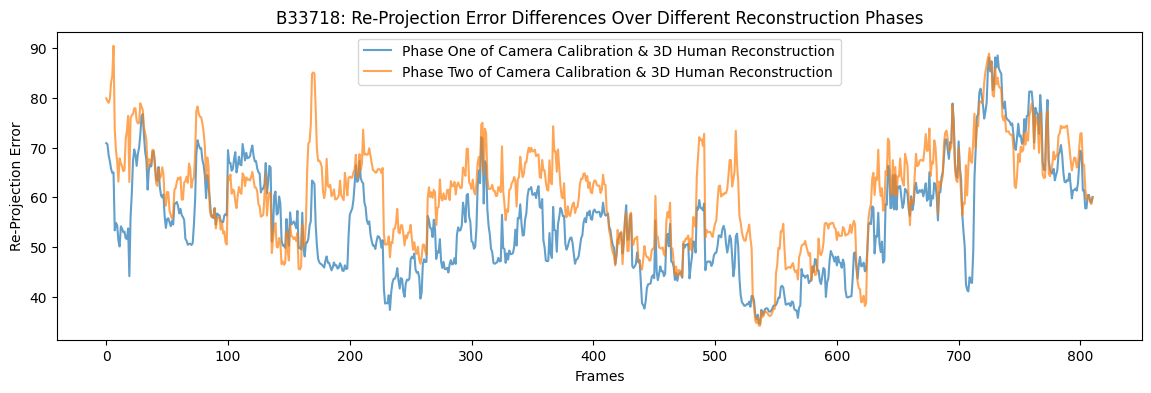

In [7]:
plot_pair_run_reproj(video_comul_reproj_per_frame[1], video_comul_reproj_per_frame[0])

----


In [7]:
DMMR_OUT_FIX= os.path.join(DMMR_PATH, 'comul_output_fix')

comul_data, outputs, _ = next(os.walk(DMMR_OUT_FIX))


videos_reproject_child = []
videos_reproject_parent = []
videos_conf_child = []
videos_conf_parent = []

for i, video_folder in enumerate(outputs):
    print(i, '-', video_folder)
    #DMMR_OUT_REPROJ_PATH = os.path.join(DMMR_PATH, 'output_B33892_miss', 'reprojection')
    comul_reproject_child = []
    comul_reproject_parent = []
    comul_conf_child = []
    comul_conf_parent = []

    reproj_data_path, data_batch, _ = next(os.walk(os.path.join(comul_data, video_folder)))

    dmmr_output_dict_parent = [[], [], [], []]
    dmmr_output_dict_child = [[], [], [], []]

    for batch in data_batch:
        batch_data_path, camera_list, _ = next(os.walk(os.path.join(reproj_data_path, batch)))
        for camera in camera_list:
            cam_id = int(str(camera).split('Camera')[1])
            path_, _, out_view = next(os.walk(os.path.join(batch_data_path, camera)))
            for cam_file in out_view:
                file_path = os.path.join(path_, cam_file)
                with open(file_path) as f:
                    reproj_dict = json.load(f)
                    dmmr_output_dict_parent[cam_id].append(reproj_dict['det_0'])
                    dmmr_output_dict_child[cam_id].append(reproj_dict['det_1'])


    comul_reproject_child, comul_reproject_parent, comul_conf_child, comul_conf_parent = get_view_comul_conf_err_per_key(dmmr_output_dict_parent, dmmr_output_dict_child)

    videos_reproject_child.append(comul_reproject_child)
    videos_reproject_parent.append(comul_reproject_parent)
    videos_conf_child.append(comul_conf_child)
    videos_conf_parent.append(comul_conf_parent)

0 - B33718_00.13.40_00.14.15
1 - B33892_fixed
2 - B35985_00.10.50_00.11.25
3 - B38777_00.11.17_00.11.52
4 - B40508_fix
5 - B44801_00.02.55_00.03.25
6 - B45111_00.11.26_00.12.01
7 - B45358_00.01.25_00.02.00
8 - B47859_00.07.35_00.08.05
9 - B51848_00.15.35_00.16.05
10 - B64396_output_fix
11 - B64612_00.01.53_00.02.23
12 - B67411_00.14.35_00.15.10
13 - B70410_00.01.20_00.01.55
14 - B83755_00.10.30_00.11.05
15 - B86218_00.06.00_00.06.35
16 - B89136_00.06.25_00.07.00
17 - B93177_00.14.25_00.15.00
18 - B97605_00.06.45_00.07.20


In [8]:
agg_reproject_child = list(map(lambda x: x / len(videos_reproject_child), np.sum(videos_reproject_child, axis=0)))
agg_reproject_parent = list(map(lambda x: x / len(videos_reproject_parent), np.sum(videos_reproject_parent, axis=0)))
agg_conf_child = list(map(lambda x: x / len(videos_conf_child), np.sum(videos_conf_child, axis=0)))
agg_conf_parent = list(map(lambda x: x / len(videos_conf_parent), np.sum(videos_conf_parent, axis=0)))

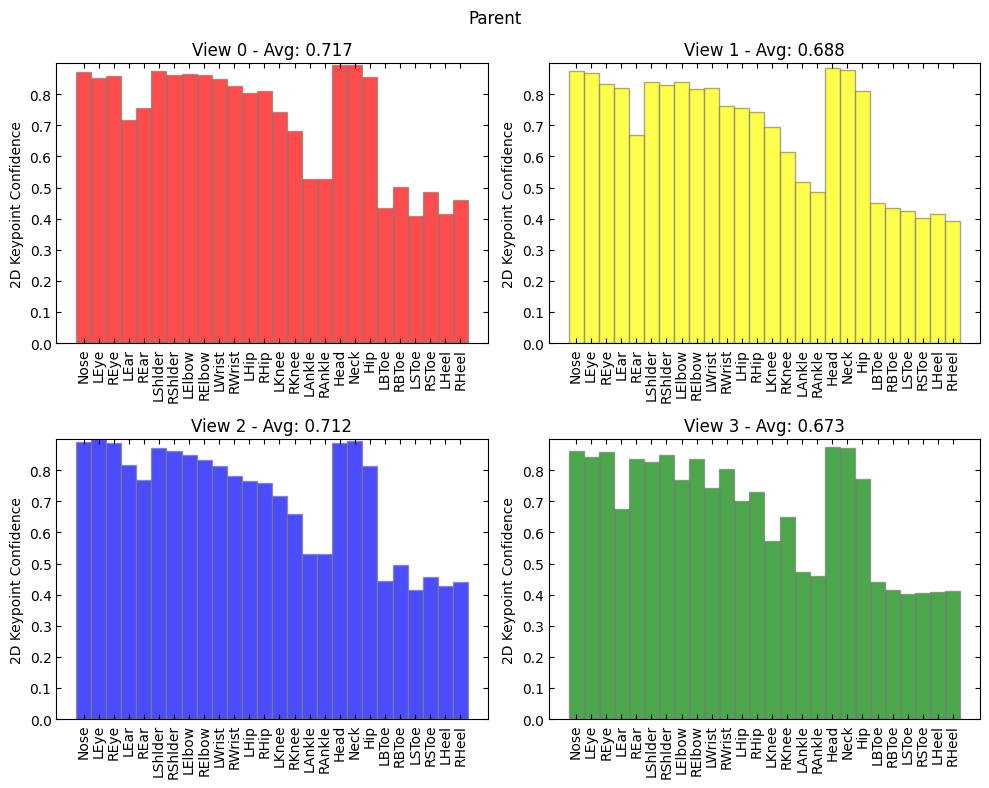

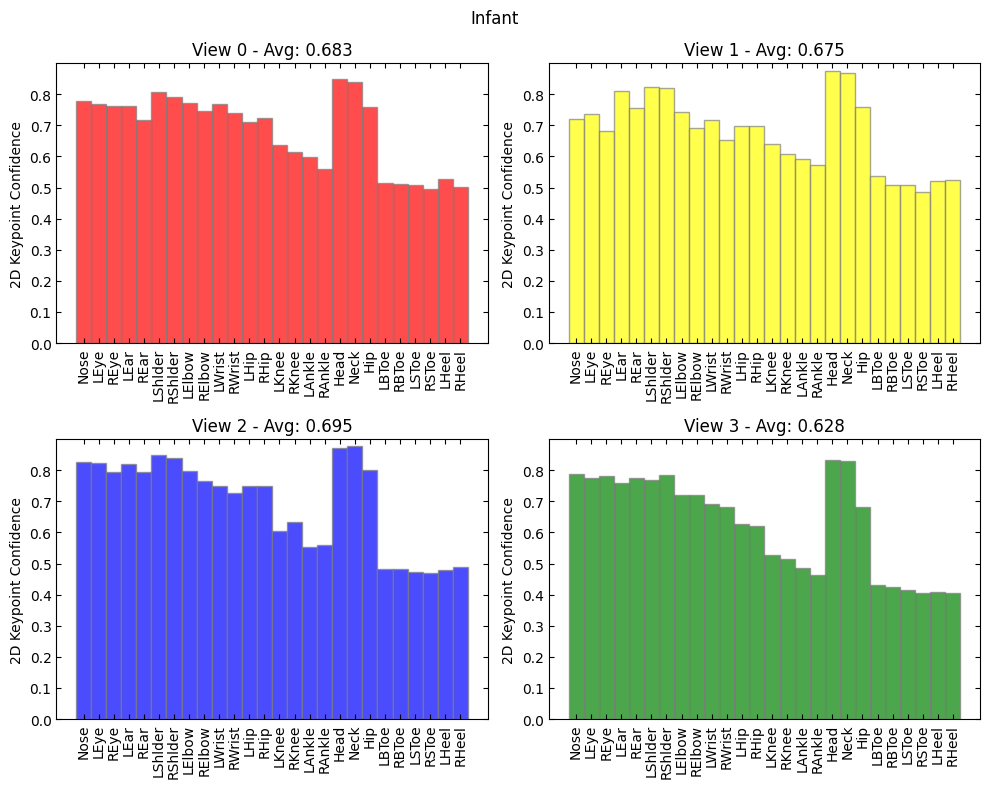

In [9]:
#Parent
max_reproj = 0
for val_p, val_c in zip(agg_reproject_parent, agg_reproject_child):
    if max(val_p) > max_reproj:
        max_reproj = max(val_p)
    if max(val_c) > max_reproj:
        max_reproj = max(val_c)

#Child
max_conf = 0
for val_p, val_c in zip(agg_conf_parent, agg_conf_child):
    if max(val_p) > max_conf:
        max_conf = max(val_p)
    if max(val_c) > max_conf:
        max_conf = max(val_c)

#plot_allviews_histogram(agg_reproject_parent, 'Re-projection Error', max_reproj, 'Parent: Phase Two of 3D Pose Estimation with Variable Number of Views')
plot_allviews_histogram(agg_conf_parent, '2D Keypoint Confidence', max_conf , 'Parent')
#
#plot_allviews_histogram(agg_reproject_child, 'Re-projection Error', max_reproj, 'Infant: Phase Two of 3D Pose Estimation with Variable Number of Views')
plot_allviews_histogram(agg_conf_child, '2D Keypoint Confidence', max_conf, 'Infant')

In [10]:


def plot_allviews_pearson_corr_coef_(comul_reproj, comul_conf, lbl1, lbl2, max_y):
    assert len(comul_reproj) == 4, f'Passed wrong comulative reprojection error variable!'
    assert len(comul_conf) == 4, f'Passed wrong comulative keypoint confidence variable!'

    r1 = np.array(comul_reproj[0])
    r2 = np.array(comul_reproj[1])
    r3 = np.array(comul_reproj[2])
    r4 = np.array(comul_reproj[3])

    c1 = np.array(comul_conf[0])
    c2 = np.array(comul_conf[1])
    c3 = np.array(comul_conf[2])
    c4 = np.array(comul_conf[3])


    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle('Infant')
    corr_matrix = np.corrcoef(r1, c1)
    corr_coeff = corr_matrix[0, 1]
    axes[0, 0].scatter(r1, c1)
    axes[0, 0].set_xlabel(lbl1)
    axes[0, 0].set_ylabel(lbl2)
    m, b = np.polyfit(r1, c1, 1)
    axes[0, 0].plot(r1, m * r1 + b, color='red')
    axes[0, 0].set_title(f'View 0 - Pearson correlation coeff: {corr_coeff:.2f}')
    axes[0, 0].set_xlim([0, max_y])
    axes[0, 0].set_ylim([0, 1])

    corr_matrix = np.corrcoef(r2, c2)
    corr_coeff = corr_matrix[0, 1]
    axes[0, 1].scatter(r2, c2)
    axes[0, 1].set_xlabel(lbl1)
    axes[0, 1].set_ylabel(lbl2)
    m, b = np.polyfit(r2, c2, 1)
    axes[0, 1].plot(r2, m * r2 + b, color='red')
    axes[0, 1].set_title(f'View 1 - Pearson correlation coeff: {corr_coeff:.2f}')
    axes[0, 1].set_xlim([0, max_y])
    axes[0, 1].set_ylim([0, 1])

    corr_matrix = np.corrcoef(r3, c3)
    corr_coeff = corr_matrix[0, 1]
    axes[1, 0].scatter(r3, c3)
    axes[1, 0].set_xlabel(lbl1)
    axes[1, 0].set_ylabel(lbl2)
    m, b = np.polyfit(r3, c3, 1)
    axes[1, 0].plot(r3, m * r3 + b, color='red')
    axes[1, 0].set_title(f'View 2 - Pearson correlation coeff: {corr_coeff:.2f}')
    axes[1, 0].set_xlim([0, max_y])
    axes[1, 0].set_ylim([0, 1])

    corr_matrix = np.corrcoef(r4, c4)
    corr_coeff = corr_matrix[0, 1]
    axes[1, 1].scatter(r4, c4)
    axes[1, 1].set_xlabel(lbl1)
    axes[1, 1].set_ylabel(lbl2)
    m, b = np.polyfit(r4, c4, 1)
    axes[1, 1].plot(r4, m * r4 + b, color='red')
    axes[1, 1].set_title(f'View 3 - Pearson correlation coeff: {corr_coeff:.2f}')
    axes[1, 1].set_xlim([0, max_y])
    axes[1, 1].set_ylim([0, 1])

    # Adjust spacing between subplots
    plt.tight_layout()

    #%matplotlib inline
    plt.show()

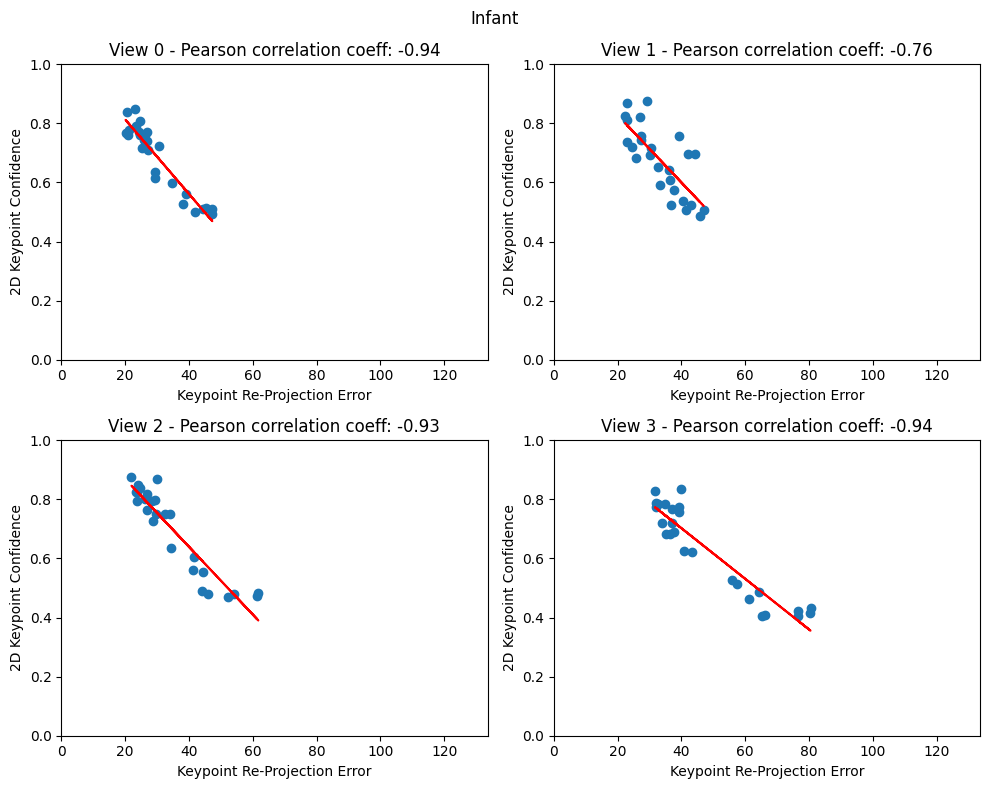

In [12]:
#plot_allviews_pearson_corr_coef_(agg_reproject_parent, agg_conf_parent, 'Keypoint Re-Projection Error', '2D Keypoint Confidence', max_reproj)
plot_allviews_pearson_corr_coef_(agg_reproject_child, agg_conf_child, 'Keypoint Re-Projection Error', '2D Keypoint Confidence', max_reproj)

In [10]:

#?

reproj_child_list = []
reproj_parent_list = []
conf_child_list = []
conf_parent_list = []

reproj_child_view_list = []
reproj_parent_view_list = []
conf_child_view_list = []
conf_parent_view_list = []

for comul_video_data_reproj_child, comul_video_data_reproj_parent, comul_video_data_conf_child, comul_video_data_conf_parent in zip(videos_reproject_child, videos_reproject_parent, videos_conf_child, videos_conf_parent):
    print('Reprojection Error - Child')
    key_comul_reproj_child, view_comul_reproj_child = print_comul_view_and_key(comul_video_data_reproj_child)
    reproj_child_list.append(key_comul_reproj_child)
    reproj_child_view_list.append(view_comul_reproj_child)
    print('Reprojection Error - Parent')
    key_comul_reproj_parent, view_comul_reproj_parent = print_comul_view_and_key(comul_video_data_reproj_parent)
    reproj_parent_list.append(key_comul_reproj_parent)
    reproj_parent_view_list.append(view_comul_reproj_parent)
    print('Keypoint Confidence - Child')
    key_comul_conf_child, view_comul_conf_child = print_comul_view_and_key(comul_video_data_conf_child)
    conf_child_list.append(key_comul_conf_child)
    conf_child_view_list.append(view_comul_conf_child)
    print('Keypoint Confidence - Parent')
    key_comul_conf_parent, view_comul_conf_parent = print_comul_view_and_key(comul_video_data_conf_parent)
    conf_parent_list.append(key_comul_conf_parent)
    conf_parent_view_list.append(view_comul_conf_parent)


Reprojection Error - Child
Nose: 24.425143997286554
LEye: 24.14501431192143
REye: 26.07154841944245
LEar: 27.579298592575018
REar: 32.6581610912808
LShlder: 26.663526282099717
RShlder: 32.0868869973699
LElbow: 25.410876869380587
RElbow: 35.61990706678779
LWrist: 24.821804370081846
RWrist: 36.167664946838066
LHip: 26.583886089582172
RHip: 40.71678824720196
LKnee: 42.49248615809489
RKnee: 47.965401923882695
LAnkle: 44.36755178194266
RAnkle: 53.850172540360205
Head: 33.233871898298645
Neck: 23.069415769386104
Hip: 27.74226191636855
LBToe: 63.15009317927233
RBToe: 70.64304269705092
LSToe: 59.05017274342801
RSToe: 69.73132088762932
LHeel: 44.25685701638869
RHeel: 57.207910727328624
----
View 0: 15.76701036766511
View 1: 23.80971991964824
View 2: 55.12605044031233
View 3: 62.17584489103278

Reprojection Error - Parent
Nose: 22.81324436419404
LEye: 23.66101858905637
REye: 23.44906312596855
LEar: 25.993718174417886
REar: 29.004476039077637
LShlder: 27.385200921192258
RShlder: 27.40959968619174

In [15]:
k_parent_list = []
for data in conf_parent_view_list:
    print(round(data[0], 3), ' & ', round(data[1], 3), ' & ', round(data[2], 3), ' & ', round(data[3], 3))
    r_parent = []
    r_parent.append(data[0])
    r_parent.append(data[1])
    r_parent.append(data[2])
    r_parent.append(data[3])

    k_parent_list.append(sum(r_parent)/len(r_parent))

print()
print(round(sum(conf_parent_view_list[0])/len(conf_parent_view_list[0]),3), '&', round(sum(conf_parent_view_list[1])/len(conf_parent_view_list[1]),3), '&',round(sum(conf_parent_view_list[2])/len(conf_parent_view_list[2]),3), '&',round(sum(conf_parent_view_list[3])/len(conf_parent_view_list[3]),3))

0.687  &  0.695  &  0.72  &  0.748
0.644  &  0.723  &  0.632  &  0.741
0.646  &  0.684  &  0.741  &  0.695
0.648  &  0.68  &  0.708  &  0.841
0.731  &  0.808  &  0.724  &  0.651
0.613  &  0.687  &  0.596  &  0.412
0.777  &  0.616  &  0.711  &  0.568
0.642  &  0.703  &  0.727  &  0.798
0.715  &  0.659  &  0.683  &  0.696
0.851  &  0.515  &  0.771  &  0.684
0.719  &  0.598  &  0.68  &  0.638
0.673  &  0.693  &  0.605  &  0.577
0.789  &  0.63  &  0.78  &  0.797
0.795  &  0.678  &  0.684  &  0.723
0.736  &  0.742  &  0.705  &  0.751
0.759  &  0.745  &  0.757  &  0.606
0.702  &  0.726  &  0.728  &  0.529
0.757  &  0.72  &  0.805  &  0.637
0.747  &  0.768  &  0.774  &  0.69

0.712 & 0.685 & 0.692 & 0.719


In [12]:
k_child_list = []
for data in conf_child_view_list:
    print(round(data[0], 3), ' & ', round(data[1], 3), ' & ', round(data[2], 3), ' & ', round(data[3], 3))
    r_parent = []
    #print(round(data[0], 3), ' & ', round(data[1], 3), ' & ', round(data[2], 3), ' & ', round(data[3], 3))
    r_parent.append(data[0])
    r_parent.append(data[1])
    r_parent.append(data[2])
    r_parent.append(data[3])

    k_child_list.append(sum(r_parent)/len(r_parent))
print(round(sum(conf_child_view_list[0])/len(conf_child_view_list[0]),3),'&', round(sum(conf_child_view_list[1])/len(conf_child_view_list[1]),3),'&', round(sum(conf_child_view_list[2])/len(conf_child_view_list[2]),3),'&', round(sum(conf_child_view_list[3])/len(conf_child_view_list[3]),3))


0.744  &  0.665  &  0.607  &  0.619
0.646  &  0.61  &  0.668  &  0.548
0.657  &  0.713  &  0.61  &  0.495
0.636  &  0.429  &  0.561  &  0.63
0.628  &  0.614  &  0.674  &  0.668
0.613  &  0.592  &  0.74  &  0.515
0.643  &  0.794  &  0.69  &  0.515
0.743  &  0.719  &  0.715  &  0.621
0.517  &  0.771  &  0.682  &  0.77
0.584  &  0.823  &  0.602  &  0.638
0.751  &  0.548  &  0.739  &  0.61
0.783  &  0.544  &  0.739  &  0.68
0.791  &  0.843  &  0.805  &  0.673
0.737  &  0.762  &  0.77  &  0.637
0.652  &  0.682  &  0.709  &  0.668
0.79  &  0.582  &  0.801  &  0.831
0.82  &  0.762  &  0.746  &  0.71
0.744  &  0.741  &  0.763  &  0.656
0.503  &  0.635  &  0.576  &  0.444
0.658 & 0.618 & 0.619 & 0.564


In [13]:
r_parent_list = []

for data in reproj_parent_view_list:
    r_parent = []
    print(round(data[0], 3), ' & ', round(data[1], 3), ' & ', round(data[2], 3), ' & ', round(data[3], 3))
    r_parent.append(data[0])
    r_parent.append(data[1])
    r_parent.append(data[2])
    r_parent.append(data[3])

    r_parent_list.append(sum(r_parent)/len(r_parent))
print(round(sum(reproj_parent_view_list[0])/len(reproj_parent_view_list[0]),3), '&',round(sum(reproj_parent_view_list[1])/len(reproj_parent_view_list[1]),3), '&',round(sum(reproj_parent_view_list[2])/len(reproj_parent_view_list[2]),3), '&',round(sum(reproj_parent_view_list[3])/len(reproj_parent_view_list[3]),3))


28.772  &  53.056  &  40.017  &  67.239
28.636  &  28.271  &  25.969  &  26.13
113.992  &  92.388  &  62.966  &  66.302
57.726  &  76.756  &  53.213  &  25.626
30.988  &  25.875  &  47.526  &  76.539
56.637  &  47.319  &  42.143  &  70.16
34.749  &  79.622  &  104.533  &  112.912
38.993  &  62.8  &  54.332  &  50.449
17.143  &  29.131  &  21.182  &  29.333
22.561  &  154.095  &  37.201  &  75.785
28.002  &  89.805  &  34.874  &  53.254
43.715  &  74.389  &  48.944  &  87.713
14.198  &  35.0  &  18.37  &  24.106
19.139  &  70.429  &  68.301  &  56.93
26.933  &  33.53  &  33.221  &  41.027
18.765  &  17.316  &  23.026  &  75.278
21.23  &  32.141  &  22.212  &  67.609
13.409  &  23.425  &  14.579  &  43.983
26.121  &  52.635  &  29.883  &  65.699
47.271 & 27.251 & 83.912 & 53.33


In [14]:
r_child_list = []
for data in reproj_child_view_list:
    r_child = []

    print(round(data[0], 3), ' & ', round(data[1], 3), ' & ', round(data[2], 3), ' & ', round(data[3], 3))
    r_child.append(data[0])
    r_child.append(data[1])
    r_child.append(data[2])
    r_child.append(data[3])

    r_child_list.append(sum(r_child)/len(r_child))
print(round(sum(reproj_child_view_list[0])/len(reproj_child_view_list[0]),3), '&',round(sum(reproj_child_view_list[1])/len(reproj_child_view_list[1]),3),'&', round(sum(reproj_child_view_list[2])/len(reproj_child_view_list[2]),3), '&',round(sum(reproj_child_view_list[3])/len(reproj_child_view_list[3]),3))


15.767  &  23.81  &  55.126  &  62.176
17.069  &  21.032  &  18.782  &  27.0
120.471  &  45.8  &  125.798  &  91.682
17.419  &  43.445  &  31.308  &  24.078
34.732  &  39.199  &  44.427  &  62.185
24.913  &  27.608  &  18.526  &  149.535
76.925  &  15.453  &  38.419  &  23.997
44.33  &  35.067  &  88.321  &  45.536
34.501  &  17.404  &  24.377  &  16.465
43.408  &  56.595  &  40.502  &  84.352
22.54  &  122.681  &  20.212  &  47.886
11.08  &  44.041  &  25.044  &  23.604
13.833  &  10.482  &  14.032  &  34.903
15.058  &  17.754  &  19.336  &  61.204
23.672  &  19.367  &  24.998  &  38.926
6.825  &  29.701  &  9.94  &  10.145
10.689  &  26.723  &  17.88  &  22.337
12.775  &  15.009  &  16.227  &  27.743
30.642  &  23.661  &  35.953  &  72.129
39.22 & 20.971 & 95.938 & 29.062


In [51]:
r_all_list = []
reproj_indiv = [[], []]
for i, (parent, child) in enumerate(zip(reproj_parent_view_list, reproj_child_view_list)):
    print(i, round(sum(parent) / len(parent), 3),  ' & ' , round(sum(child) / len(child), 3))
    reproj_indiv[0].append(round(sum(parent) / len(parent), 3))
    reproj_indiv[1].append(round(sum(child) / len(child)))
    r_child = []
    r_child.append((child[0] + parent[0])/2)
    r_child.append((child[1] + parent[1])/2)
    r_child.append((child[2] + parent[2])/2)
    r_child.append((child[3] + parent[3])/2)
    r_all_list.append(sum(r_child)/len(r_child))
print(round(sum(reproj_indiv[0]) / len(reproj_indiv[0]), 3),'&', round(sum(reproj_indiv[1]) / len(reproj_indiv[1]), 3))


0 35.559  &  28.645
1 35.43  &  21.949
2 35.419  &  23.906
3 43.26  &  20.766
4 34.93  &  27.015
5 78.768  &  68.774
43.894 & 32.0


In [52]:
f = 98.602
s =  95.938 
print(round(abs(f-s), 3))

2.664


In [53]:
k_conf_list = []
keypint_conf_indiv = [[], []]
for parent, child in zip(conf_parent_view_list, conf_child_view_list):
    r_child = []
    print(round(sum(parent) / len(parent), 3),  ' & ' , round(sum(child) / len(child), 3))
    keypint_conf_indiv[0].append(round(sum(parent) / len(parent), 3))
    keypint_conf_indiv[1].append(round(sum(child) / len(child), 3))
    r_child.append((child[0] + parent[0])/2)
    r_child.append((child[1] + parent[1])/2)
    r_child.append((child[2] + parent[2])/2)
    r_child.append((child[3] + parent[3])/2)

    k_conf_list.append(sum(r_child)/len(r_child))
print(round(sum(keypint_conf_indiv[0]) / len(keypint_conf_indiv[0]), 3), '&',round(sum(keypint_conf_indiv[1]) / len(keypint_conf_indiv[1]), 3))

0.665  &  0.691
0.665  &  0.691
0.665  &  0.691
0.665  &  0.691
0.665  &  0.691
0.684  &  0.672
0.668 & 0.688


In [ ]:
agg_reproj_child_list = list(map(lambda x: x / len(reproj_child_list), np.sum(reproj_child_list, axis=0)))
agg_reproj_parent_list = list(map(lambda x: x / len(reproj_parent_list), np.sum(reproj_parent_list, axis=0)))
agg_conf_child_list = list(map(lambda x: x / len(conf_child_list), np.sum(conf_child_list, axis=0)))
agg_conf_parent_listt = list(map(lambda x: x / len(conf_parent_list), np.sum(conf_parent_list, axis=0)))

agg_reproj_child_view_list = list(map(lambda x: x / len(reproj_child_view_list), np.sum(reproj_child_view_list, axis=0)))
agg_reproj_parent_view_list = list(map(lambda x: x / len(reproj_parent_view_list), np.sum(reproj_parent_view_list, axis=0)))
agg_conf_child_view_list = list(map(lambda x: x / len(conf_child_view_list), np.sum(conf_child_view_list, axis=0)))
agg_conf_parent_view_list = list(map(lambda x: x / len(conf_parent_view_list), np.sum(conf_parent_view_list, axis=0)))

In [ ]:
agg_reproj_child_view_list

[15.758335147318157, 35.63175151480378, 26.01160980797671, 24.11370200399963]

-----

In [15]:
re_id_errors = [202, 16, 119, 43, 779, 95, 34, 0, 0, 136, 430, 63, 0, 0, 0, 0, 315, 0, 0]
ap_errors =    [88, 5, 108, 37, 181, 19, 38, 4, 6, 63, 226, 18, 8, 9, 7, 12, 142, 12, 7 ]

assert len(re_id_errors) == len(ap_errors) == len(k_conf_list) == len(r_all_list)

print('TorchReID Errors', 'Keypoint Confidence', np.corrcoef(re_id_errors, k_conf_list)[0, 1])
print('TorchReID Errors', 'Re-Projection Error', np.corrcoef(re_id_errors, r_all_list)[0, 1])

print('AlphaPose Errors', 'Keypoint Confidence', np.corrcoef(ap_errors, k_conf_list)[0, 1])
print('AlphaPose Errors', 'Re-Projection Error', np.corrcoef(ap_errors, r_all_list)[0, 1])






#plot_allviews_pearson_corr_coef(re_id_errors, k_conf_list, 'TorchReID Errors', 'Keypoint Confidence', max(k_conf_list))
#plot_allviews_pearson_corr_coef(re_id_errors, r_all_list, 'TorchReID Errors', 'Keypoint Confidence', max(r_all_list))

#plot_allviews_pearson_corr_coef(ap_errors, k_conf_list, 'AlphaPose Errors', 'Keypoint Confidence', max(k_conf_list))
#plot_allviews_pearson_corr_coef(ap_errors, r_all_list, 'AlphaPose Errors', 'Keypoint Confidence', max(r_all_list))



TorchReID Errors Keypoint Confidence -0.0932659273043649
TorchReID Errors Re-Projection Error 0.22400479919589358
AlphaPose Errors Keypoint Confidence -0.11791165757548681
AlphaPose Errors Re-Projection Error 0.3822744956836516


In [18]:
sum(re_id_errors)/len(re_id_errors)

117.47368421052632

----


In [33]:
DMMR_OUT_REPROJ_PATH = os.path.join(DMMR_PATH, 'output', 'reprojection')

reproj_data_path, data_batch, _ = next(os.walk(DMMR_OUT_REPROJ_PATH))



dmmr_output_dict_parent = [[], [], [], []]
dmmr_output_dict_child = [[], [], [], []]

for batch in data_batch:
    print(batch)
    batch_data_path, camera_list, _ = next(os.walk(os.path.join(reproj_data_path, batch)))
    for camera in camera_list:
        cam_id = int(str(camera).split('Camera')[1])
        path_, _, out_view = next(os.walk(os.path.join(batch_data_path, camera)))
        for cam_file in out_view:
            file_path = os.path.join(path_, cam_file)
            with open(file_path) as f:
                reproj_dict = json.load(f)
                dmmr_output_dict_parent[cam_id].append(reproj_dict['det_0'])
                dmmr_output_dict_child[cam_id].append(reproj_dict['det_1'])


comul_reproject_child, comul_reproject_parent, comul_conf_child, comul_conf_parent = get_view_comul_conf_err_per_key(dmmr_output_dict_parent, dmmr_output_dict_child)

            

Laura_00.03.45_00.04.20


In [34]:
comul_reproject_child, comul_reproject_parent, comul_conf_child, comul_conf_parent = get_view_comul_conf_err_per_key(dmmr_output_dict_parent, dmmr_output_dict_child)

In [35]:
print(len(comul_reproject_child))
print(len(comul_reproject_child[0]))

4
26


In [ ]:
print(f'child reprojection error standard deviation: {get_standard_dev(comul_reproject_child)}')
print(f'child keypoint confidence standard deviation: {get_standard_dev(comul_conf_child)*100}')
print(f'parent reprojection error standard deviation: {get_standard_dev(comul_reproject_parent)}')
print(f'parent keypoint confidence standard deviation: {get_standard_dev(comul_conf_parent)*100}')

In [36]:
print('Reprojection Error - Child')
key_comul_reproj_child, view_comul_reproj_child = print_comul_view_and_key(comul_reproject_child)
print('Reprojection Error - Parent')
key_comul_reproj_parent, view_comul_reproj_parent = print_comul_view_and_key(comul_reproject_parent)
print('Keypoint Confidence - Child')
key_comul_conf_child, view_comul_conf_child = print_comul_view_and_key(comul_conf_child)
print('Keypoint Confidence - Parent')
key_comul_conf_parent, view_comul_conf_parent = print_comul_view_and_key(comul_conf_parent)

Reprojection Error - Child
Nose: 9.668857858350998
LEye: 8.79358880898244
REye: 9.043238427441025
LEar: 11.310429355889752
REar: 11.449260791175384
LShlder: 6.551043592689059
RShlder: 6.571404040582738
LElbow: 5.4266039559449
RElbow: 7.875498546165195
LWrist: 10.01716641381581
RWrist: 12.015453090449093
LHip: 12.390569672593356
RHip: 13.56899762932061
LKnee: 15.21476997942506
RKnee: 21.120654574902698
LAnkle: 20.840916921127416
RAnkle: 23.075912443966516
Head: 9.934791491742489
Neck: 6.717670186832596
Hip: 10.983798841455055
LBToe: 26.609867103617077
RBToe: 30.201510247549084
LSToe: 25.0811218209424
RSToe: 28.866600412596878
LHeel: 22.532241987769233
RHeel: 25.740282809880682
----
View 0: 12.225053359822542
View 1: 27.935479832622327
View 2: 20.08596696220244
View 3: 0.0

Reprojection Error - Parent
Nose: 6.446374672353253
LEye: 7.2420177787217455
REye: 6.1941796911287135
LEar: 12.90719072525306
REar: 10.9875844275817
LShlder: 10.173425643532177
RShlder: 7.1386446009090925
LElbow: 10.3

<b>Pearson correlation coefficient:</b> measures the linear relationship between two variables<br>


In [ ]:
#Parent
max_reproj = 0
for val_p, val_c in zip(comul_reproject_parent, comul_reproject_child):
    if max(val_p) > max_reproj:
        max_reproj = max(val_p)
    if max(val_c) > max_reproj:
        max_reproj = max(val_c)

#Child
max_conf = 0
for val_p, val_c in zip(comul_conf_parent, comul_conf_child):
    if max(val_p) > max_conf:
        max_conf = max(val_p)
    if max(val_c) > max_conf:
        max_conf = max(val_c)

plot_allviews_histogram(comul_reproject_parent, 'Parent Reprojection Error', max_reproj)
plot_allviews_histogram(comul_conf_parent, 'Parent Det. Confidence', max_conf)

plot_allviews_histogram(comul_reproject_child, 'Child Reprojection Error', max_reproj)
plot_allviews_histogram(comul_conf_child, 'Child Det. Confidence', max_conf)

In [ ]:
plot_allviews_pearson_corr_coef(comul_reproject_parent, comul_conf_parent, 'Parent Keypoint Reprojection Error', 'Parent Keypoint Confidence', max_reproj)
plot_allviews_pearson_corr_coef(comul_reproject_child, comul_conf_child, 'Child Keypoint Reprojection Error', 'Child Keypoint Confidence', max_reproj)

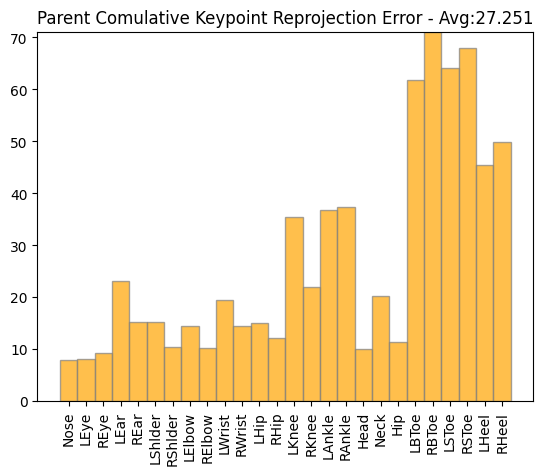

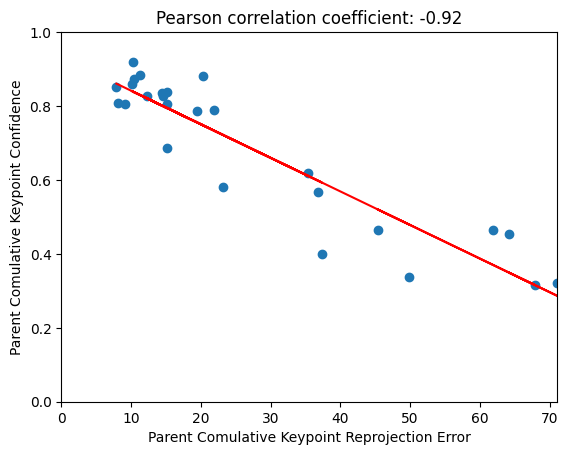

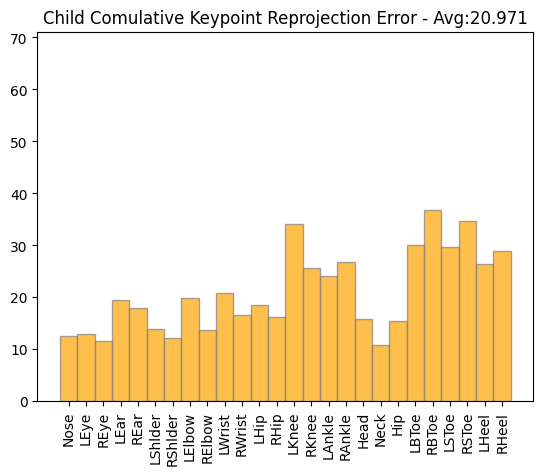

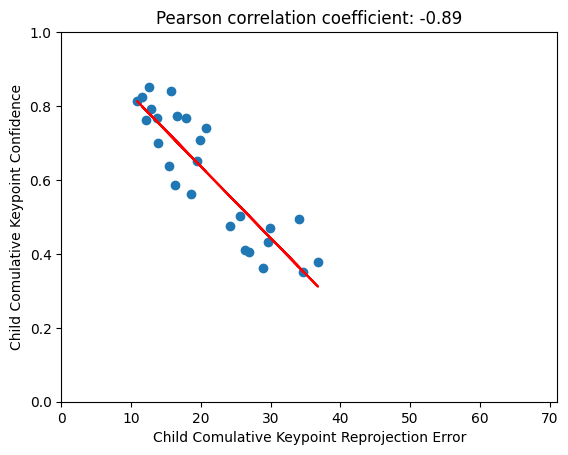

In [ ]:
max_comul_reproj = 0
for val_p, val_c in zip(key_comul_reproj_parent, key_comul_reproj_child):
    if val_p > max_comul_reproj:
        max_comul_reproj = val_p
    if val_c > max_comul_reproj:
        max_comul_reproj = val_c

#Parent
plot_comul_hist(key_comul_reproj_parent, 'Parent Comulative Keypoint Reprojection Error', max_comul_reproj)
plot_pearson_corr_coef(key_comul_reproj_parent, key_comul_conf_parent, 'Parent Comulative Keypoint Reprojection Error', 'Parent Comulative Keypoint Confidence', max_comul_reproj)

#Child
plot_comul_hist(key_comul_reproj_child, 'Child Comulative Keypoint Reprojection Error', max_comul_reproj)
plot_pearson_corr_coef(key_comul_reproj_child, key_comul_conf_child, 'Child Comulative Keypoint Reprojection Error', 'Child Comulative Keypoint Confidence', max_comul_reproj)